In [2]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

import tensorflow as tf
from matplotlib import pyplot as plt

In [19]:
import numpy as np

class CartesCoordinator:
  """
    Collection of utils for vector operation samples and exercise
  """
  def draw_coord(ax, xlim=(-5,5), ylim=(-5,5), tick_freq=1, aspect=1):
    xmin, xmax = xlim
    ymin, ymax = ylim

    ax.set(xlim=(xmin, xmax + tick_freq), ylim=(ymin, ymax + tick_freq), aspect=aspect)

    # Employ bottom, left spines as x,y axes
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top, right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x,y label on axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-24, y=1.03, rotation=0)

    x_ticks = np.arange(xmin, xmax+tick_freq, tick_freq)
    y_ticks = np.arange(ymin, ymax+tick_freq, tick_freq)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Arrows for axes
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot(1, 0, marker='>', transform=ax.get_yaxis_transform(),**arrow_fmt)
    ax.plot(0, 1, marker='^', transform=ax.get_xaxis_transform(),**arrow_fmt)

class EulerNumberVisualization:
  def draw_f(ax, f, func_name, x_lim, y_lim, delta=0.01, X_in=None, alpha=1, tick_freq=1):
    X = X_in if (X_in is not None) else tf.range(x_lim[0], x_lim[1] + delta, delta=delta)

    X = tf.boolean_mask(X, tf.less(f(X), y_lim[1]))
    Y = f(X)

    # Draw f(x)
    ax.plot(X, Y, '-', alpha=alpha, linewidth=2)
    # ax.text(X[-1], Y[-1] + 2, func_name, fontsize=15)


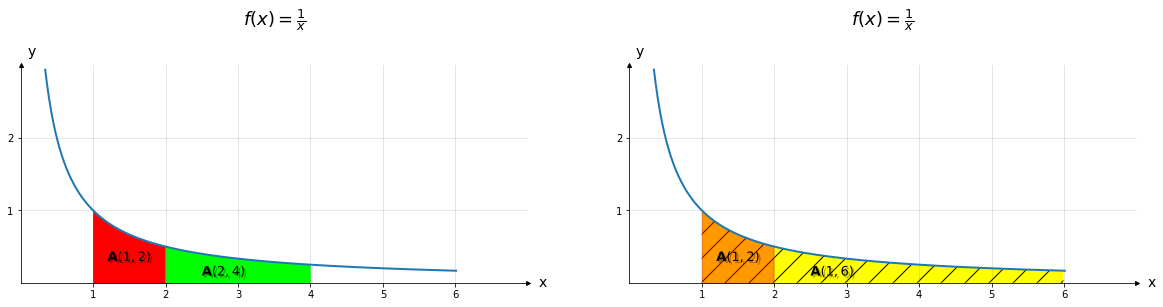

In [20]:
from matplotlib import ticker
import matplotlib.patheffects as path_effects

tf.random.set_seed(32)

x_domain = (0, 6)
y_domain = (0, 3)
fig, ax = plt.subplots(1, 2,figsize=(20,10))

### f(x)
f = lambda x: 1/x

ax[0].set_title(r'$f(x) = \frac{1}{x}$', pad=40, size=18)
CartesCoordinator.draw_coord(ax[0], x_domain, (0, 2), aspect=1)
EulerNumberVisualization.draw_f(ax[0], f, 'y = 1/x', x_domain, y_domain, tick_freq=0.01)

ax[1].set_title(r'$f(x) = \frac{1}{x}$', pad=40, size=18)
CartesCoordinator.draw_coord(ax[1], x_domain, (0, 2), aspect=1)
EulerNumberVisualization.draw_f(ax[1], f, 'y = 1/x', x_domain, y_domain, tick_freq=0.01)


## Area visualization

### Fig 1
domain = np.arange(1, 2, 0.01)
ax[0].fill_between(domain, f(domain), color='red')
ax[0].text(1.2, 0.3, r'$\mathbf{A}(1,2)$', size='13', path_effects=[path_effects.withSimplePatchShadow()])

domain = np.arange(2, 4, 0.01)
ax[0].fill_between(domain, f(domain), color='lime')
ax[0].text(2.5, 0.1, r'$\mathbf{A}(2,4)$', size='13', path_effects=[path_effects.withSimplePatchShadow()])

### Fig 2
domain = np.arange(1, 6, 0.01)
ax[1].fill_between(domain, f(domain), fc='yellow', hatch='/')
ax[1].text(2.5, 0.1, r'$\mathbf{A}(1,6)$', size='13', path_effects=[path_effects.withSimplePatchShadow()])

domain = np.arange(1, 2, 0.01)
ax[1].fill_between(domain, f(domain), color='red', alpha=0.4)
ax[1].text(1.2, 0.3, r'$\mathbf{A}(1,2)$', size='13', path_effects=[path_effects.withSimplePatchShadow()])

plt.show()

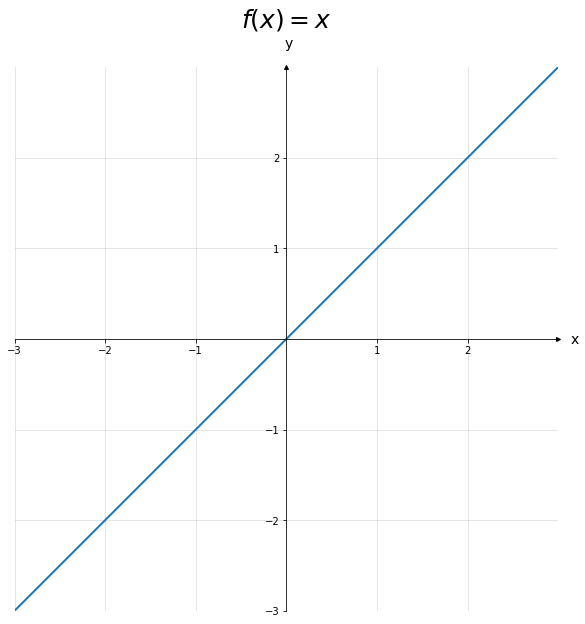

In [34]:
from matplotlib import ticker
import matplotlib.patheffects as path_effects

tf.random.set_seed(32)

x_domain = (-3, 2)
y_domain = (-3, 2)
fig, ax = plt.subplots(1, 1,figsize=(10,10))

### f(x)
f = lambda x: x

ax.set_title(r'$f(x) = x$', pad=40, size=25)
CartesCoordinator.draw_coord(ax, x_domain, y_domain, aspect=1)
EulerNumberVisualization.draw_f(ax, f, 'y = 1/x', (-3,3), (-3,3), tick_freq=0.01)

plt.show()

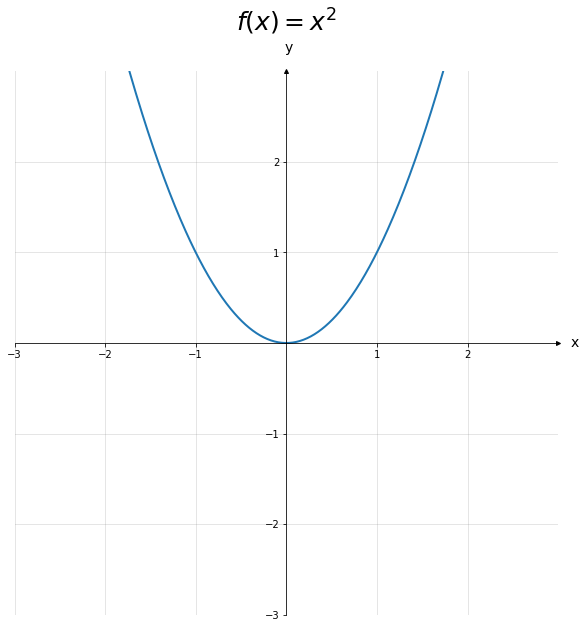

In [35]:
from matplotlib import ticker
import matplotlib.patheffects as path_effects

tf.random.set_seed(32)

x_domain = (-3, 2)
y_domain = (-3, 2)
fig, ax = plt.subplots(1, 1,figsize=(10,10))

### f(x)
f = lambda x: x**2

ax.set_title(r'$f(x) = x^2$', pad=40, size=25)
CartesCoordinator.draw_coord(ax, x_domain, y_domain, aspect=1)
EulerNumberVisualization.draw_f(ax, f, 'y = 1/x', (-3,3), (-3,3), tick_freq=0.01)

plt.show()

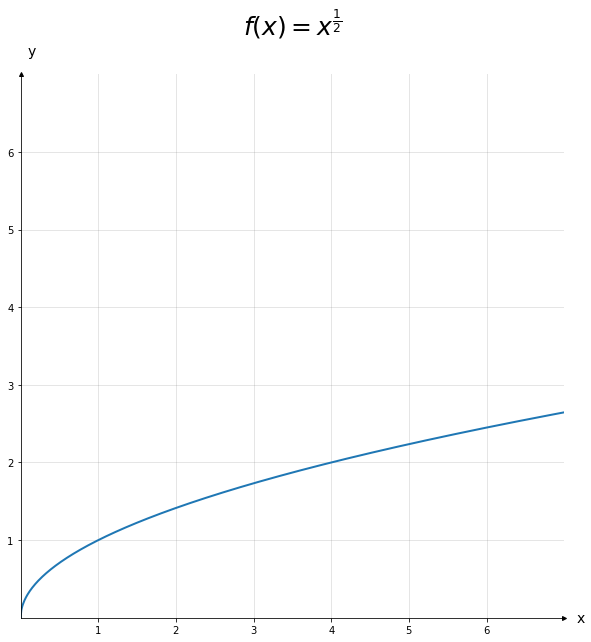

In [36]:
from matplotlib import ticker
import matplotlib.patheffects as path_effects

tf.random.set_seed(32)

x_domain = (0, 6)
y_domain = (0, 6)
fig, ax = plt.subplots(1, 1,figsize=(10,10))

### f(x)
f = lambda x: np.sqrt(x)

ax.set_title(r'$f(x) = x^{\frac{1}{2}}$', pad=40, size=25)
CartesCoordinator.draw_coord(ax, x_domain, y_domain, aspect=1)
EulerNumberVisualization.draw_f(ax, f, 'y = 1/x', (0,7), (0,7), tick_freq=0.01)

plt.show()

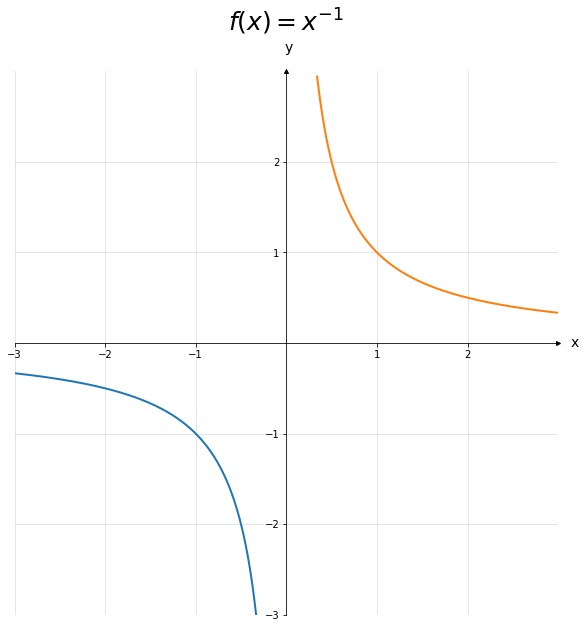

In [37]:
from matplotlib import ticker
import matplotlib.patheffects as path_effects

tf.random.set_seed(32)

x_domain = (-3, 2)
y_domain = (-3, 2)
fig, ax = plt.subplots(1, 1,figsize=(10,10))

### f(x)
f = lambda x: 1/x

ax.set_title(r'$f(x) = x^{-1}$', pad=40, size=25)
CartesCoordinator.draw_coord(ax, x_domain, y_domain, aspect=1)
EulerNumberVisualization.draw_f(ax, f, 'y = 1/x', (-3, -0.0001), y_domain, tick_freq=0.01)
EulerNumberVisualization.draw_f(ax, f, 'y = 1/x', (0, 2.999), (0, 3), tick_freq=0.01)

plt.show()